# Lab 2

## convolution
There are several operations to manipulate images, one of the most used is convolution. As a reminder, the convolution operation for a __discrete__ signal is defined as: $$[f*g](n)=\sum _{i=-inf}^{+inf} f(i) g(n-i)=\sum _{i=-inf}^{+inf} g(i) f(n-i)$$
In the case of an image, the signal is in 2 dimensions and the formula is rewritten as:
$$[f*g](m,n)=\sum _{i=-inf}^{+inf}\sum _{j=-inf}^{+inf} f(i,j) g(m-i,n-j)=\sum _{i=-inf}^{+inf} g(i,j) f(m-i,n-j)$$

Here, f represents the image that will undergo the operation and g is the so-called __kernel__.

In practice, this mathematical formula is quite simple, as shown in the following image:

![SegmentLocal](./3D_Convolution_Animation.gif "segment")

The kernel is a window that slides over each pixel of the image f. The new pixel obtained is a linear combination of the old pixel and its close neighbors (depending on the dimension of the kernel). The coefficients of the linear combination are the kernel g. When the image is a _grayscale_ image, the operation only needs to be done once, but when it is an RGB image, the operation needs to be applied to each _channel_.

There are some constraints on the kernels used: the dimension of the kernel must be odd and smaller than that of the image (for example 3x3) and we normalize the coefficients of the kernel so that their sum is 0,1 or -1. We also have to decide what happens on the edges, 3 possibilities: duplicate the pixels on the edges to apply the convolution (see image), set these coefficients to 0 or do not convolve on the edges. 

The first use of this convolution operation is the __convolution filter__.


## Convolution Filter
We will implement the convolution operation and test the convolution filter with different kernels to see the results.

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

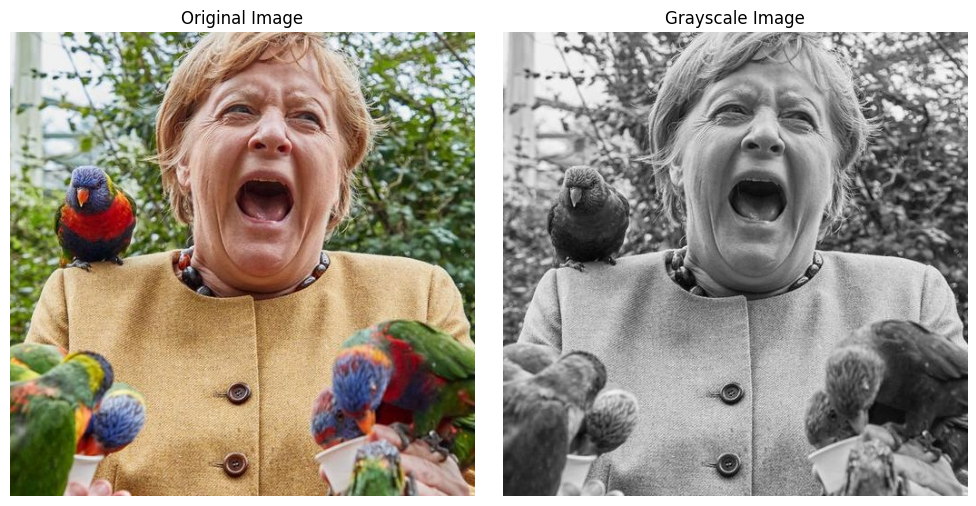

In [62]:
# Function to convert an RGB image to grayscale

#! NOT a convolution (combining each pixel with its neighbors using a kernel (like blur, sharpen, edge detection).)
#! grayscale = single channel transformation,

def rgb2gray(rgb):
    # Split the 3D RGB image array into its three color channels:
    # - rgb[:,:,0] → Red channel (2D array of intensities)
    # - rgb[:,:,1] → Green channel
    # - rgb[:,:,2] → Blue channel
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

    # Compute grayscale using a weighted sum of R, G, and B channels.
    # These weights reflect human visual perception:
    # - Green contributes the most (0.5870) since the human eye is most sensitive to green.
    # - Red contributes significantly (0.2989).
    # - Blue contributes the least (0.1140).
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    # Convert the result to an unsigned 8-bit integer type (0–255 pixel values).
    # np.uint8 ensures the grayscale image is properly stored as an image.
    return np.uint8(gray)


img = mpimg.imread("Angela.jpg")

gray = rgb2gray(img)

# ====================================================

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes for cleaner look

# Grayscale image
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")


plt.tight_layout()

# 'cmap="gray"' tells matplotlib to use a grayscale colormap (instead of default rainbow colors).
plt.imshow(gray, cmap='gray')
plt.show()





## Exercice 1

Define `convolution2D` which applies convolution with kernel `H` on `X`. The result of the convolution is of the same form as `X`. Choose how you want to treat the edge case.

In [64]:
# Each pixel H1, H2,.. is convoluted : new H1 = the sum of the product between the 8 surrounding neighbors of H1 and the static filter X

# Padding (extra Edges) can be zeroes, or copies of the edges themselves.

# Reminder about convolution:
# For each pixel in the image X, we place the kernel H over its neighborhood.
# We multiply each kernel weight with the corresponding pixel value,
# sum all those products, and that becomes the new pixel value.
# This operation is repeated for every pixel in the image.

# Extra pixels ("padding") must be added around the image borders,
# otherwise the kernel wouldn't fit at the edges.
# Padding can be zeros, or repetitions of the border pixels.

debug_print = False

def convolution2D(X, H):
    """
    Apply 2D convolution on image X with kernel H.
    Returns a new image of the same size as X.
    """

    # ------------------------------
    # 1. Dimensions
    # ------------------------------
    # X is the input image (2D grayscale array).
    # H is the kernel (2D filter matrix, usually small like 3x3 or 5x5).
    m, n = X.shape    # m = number of rows (height), n = number of columns (width)
    k, l = H.shape    # k = kernel height, l = kernel width

    if debug_print :
        print(f"X dim : {m}x{n}")
        print(f"H dim : {k}x{l}")

    # ------------------------------
    # 2. Padding calculation
    # ------------------------------
    # To apply convolution on the border pixels, we must "pad" the image.
    # Example: with a 3x3 kernel, we need 1 pixel padding on each side.
    # Formula: padding = floor(kernel_size / 2)
    pad_y = k // 2    # vertical padding (top/bottom)
    pad_x = l // 2    # horizontal padding (left/right)

    # Add padding around the image.
    # mode='constant' means we fill with zeros.
    X_padded = np.pad(X, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant')

    if debug_print :
        print(f"pad_y : {pad_y}")
        print(f"pad_x : {pad_x}")
        print(f"X_padded : {X_padded}")

    # ------------------------------
    # 3. Prepare result matrix
    # ------------------------------
    # We create an output image with the same size as X.
    # dtype=float avoids overflow during summation.
    result = np.zeros_like(X, dtype=float)

    # ------------------------------
    # 4. Convolution loop
    # ------------------------------
    # For each pixel (i,j) in the *original* image:
    for i in range(m):
        for j in range(n):

            # Extract the region of X_padded covered by the kernel
            # The region has the same size as the kernel (k x l).
            region = X_padded[i:i+k, j:j+l]

            # Multiply region by kernel, element-wise, then sum.
            # This gives the new pixel value after convolution.
            value = np.sum(region * H)

            # Assign the computed value to the result image.
            result[i, j] = value

    return result





Once your function is defined, the following code should work

You will find several types of kernel to apply on the image. You can also combine several convolutions one after the other. Don't hesitate to invent some or look for common kernels on the net.

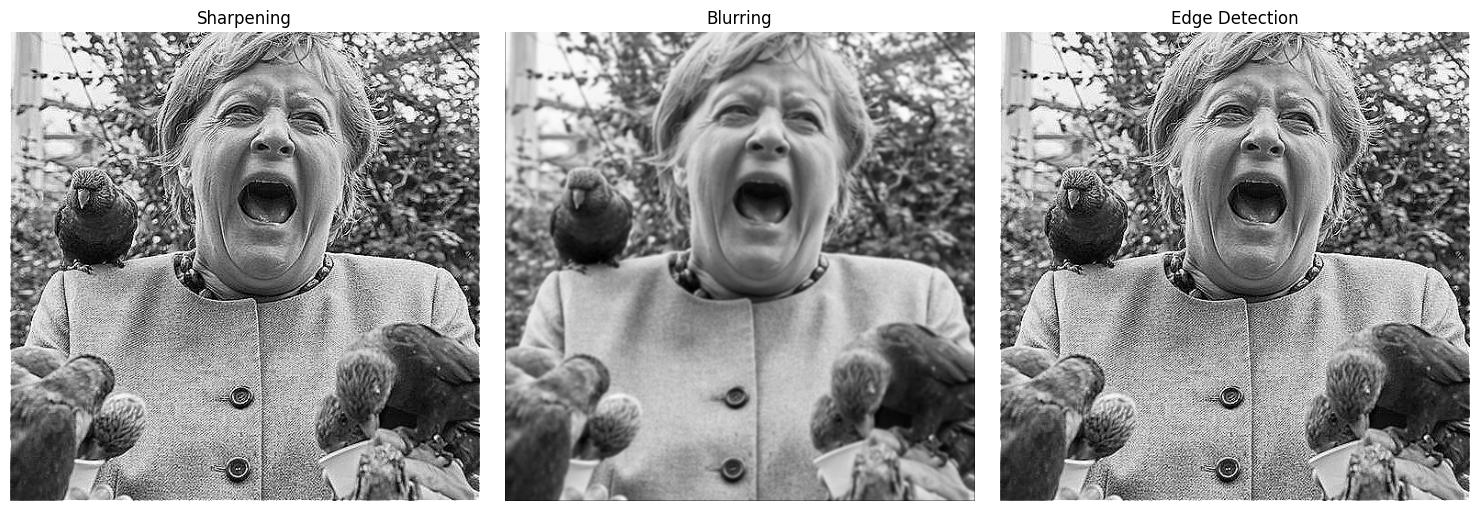

In [89]:
# Define kernels
H_sharpen =   np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
H_edge_detection = np.array([[-1, -1, -1],[-1,  8, -1],[-1, -1, -1]])
H_blur = np.ones((3,3)) * 1.0/9

# np.clip allows to crop the values of the array between [0,255]
# which is the range of possible values for pixels
res_sharpen = np.clip(convolution2D(gray, H_sharpen), 0, 255)
res_edge    = np.clip(convolution2D(gray, H_edge_detection), 0, 255)
res_blur    = np.clip(convolution2D(gray, H_blur), 0, 255)

# ================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Sharpened image
axes[0].imshow(res_sharpen, cmap='gray')
axes[0].set_title("Sharpening")
axes[0].axis("off")

# Blurred image
axes[1].imshow(res_blur, cmap='gray')
axes[1].set_title("Blurring")
axes[1].axis("off")

# Edge detected image
axes[2].imshow(res_edge, cmap='gray')
axes[2].set_title("Edge Detection")
axes[2].axis("off")

plt.tight_layout()

plt.imshow(res, cmap='gray')
plt.show()

## Scipy

You can calculate convolution operations with `convolve2d` from the `scipy.signal` module which is much faster. The `filter2D` function in OpenCV also allows you to do this.

## Exercice 2

Use one of the predefined functions listed above to perform a convolution.

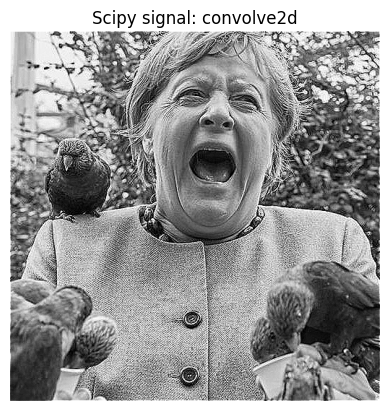

In [87]:
# scipy.signal.convolve2d : 
#   https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

from scipy.signal import convolve2d   #! dont forget to pip install scipy in your venv

# convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0)
# in1 : First input.
# in2 : Second input. Should have the same number of dimensions as in1.
# mode # A string indicating the size of the output:
    # full : The output is the full discrete linear convolution of the inputs. (Default)
    # valid : The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.
    # same : The output is the same size as in1, centered with respect to the ‘full’ output.
# boundary : A flag indicating how to handle boundaries:
    # fill : pad input arrays with fillvalue. (default)
    # wrap : circular boundary conditions.
    # symm : symmetrical boundary conditions.
# fillvaluescalar : Value to fill pad input arrays with. Default is 0.


res = convolve2d(gray, H_sharpen, mode='same', boundary='fill', fillvalue=0)
res = np.clip(res, 0, 255).astype(np.uint8)

# ====================================================================

plt.title("Scipy signal: convolve2d")
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()


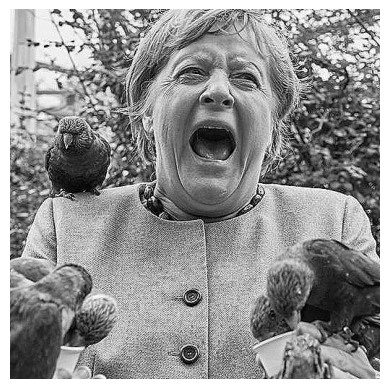

In [86]:
# OpenCV filter2D :
    # https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

import cv2

# cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	)
    # src	input image.
    # dst	output image of the same size and the same number of channels as src.
    # ddepth	desired depth of the destination image, see combinations
    # kernel	convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
    # anchor	anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
    # delta	optional value added to the filtered pixels before storing them in dst.
    # borderType	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

res = cv2.filter2D(src=gray, ddepth=-1, kernel=H)

res = np.clip(res, 0, 255).astype(np.uint8)


plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()




## Binarization

The binarization of an image is to produce an image whose pixels are Booleans. We usually start with an input image and apply a condition on each pixel. The goal is to isolate the object of interest from the image and to obtain `True` pixels for the pixels that belong to it (*foreground*) and `False` pixels for the pixels of the *background*.

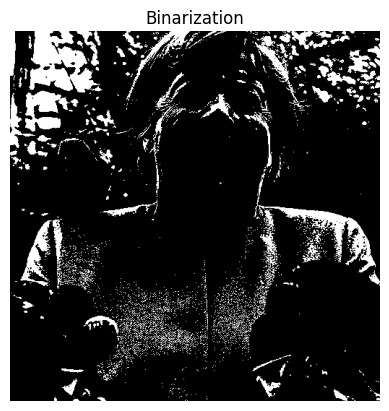

In [83]:
img = mpimg.imread("Angela.jpg")
gray =rgb2gray(img)

# numpy magic !
bin = gray > 200   # apply threshold (if pixel intensity >128, True)

plt.title("Binarization")
plt.axis('off')
plt.imshow(bin, cmap='gray')
plt.show()

A binarized image can contain `True` and `False` but also `0` and `1` or `0` and `255`. We will see later that OpenCV doesn't like boolean images very much and that you will have to convert them into 8-bit unsigned integers.

In [24]:
# np.uint8 converts each element to unsigned 8-bit integer (range 0–255).
    # False → 0
    # True → 1

bin = np.uint8(bin)

## Color selection

A common way to binarize is to select a particular color in the image. Beware that two colors visually close are sometimes not very close in RGB space. It is generally recommended to switch to HSV to perform this kind of operation.

In [ ]:
img = mpimg.imread("nemo.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

## Exercise 3

Use OpenCV's `inRange` function to select the red color of the image `nemo.jpg`.

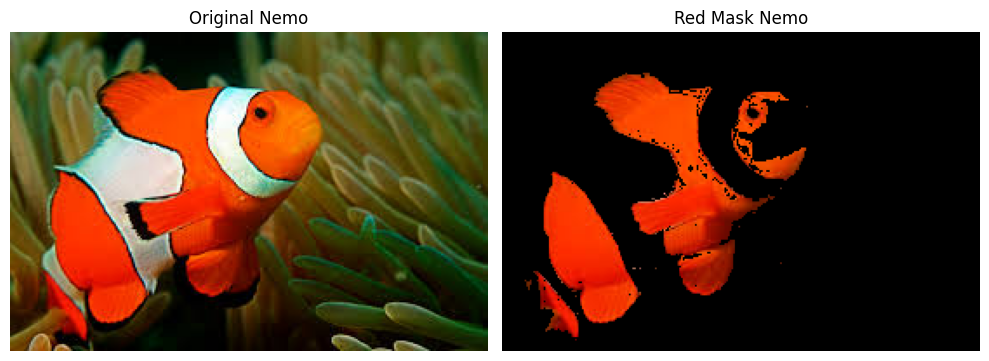

In [93]:
# OpenCV filter2D :
    # https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981

import cv2

# cv.inRange(src, lowerb, upperb[, dst]	)
    # src	first input array.
    # lowerb	inclusive lower boundary array or a scalar.
    # upperb	inclusive upper boundary array or a scalar.
    # dst	output array of the same size as src and CV_8U type.

def maskColor(filterColor, imgPath):
    # Load and convert to HSV
    img = cv2.cvtColor(cv2.imread(imgPath), cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    COLOR_RANGES = {
        'RED': [(0, 100, 100), (10, 255, 255)],
        'ORANGE': [(10, 100, 100), (25, 255, 255)],
        'YELLOW': [(25, 100, 100), (35, 255, 255)],
        'GREEN': [(35, 100, 100), (85, 255, 255)],
        'CYAN': [(85, 100, 100), (95, 255, 255)],
        'BLUE': [(95, 100, 100), (130, 255, 255)],
        'PURPLE': [(130, 100, 100), (170, 255, 255)],
        'PINK': [(170, 50, 50), (180, 255, 255), (0, 50, 50), (10, 255, 255)]  # Two ranges for pink
    }

    # Create mask and apply it
    lowerb = np.array(COLOR_RANGES[filterColor][0])
    upperb = np.array(COLOR_RANGES[filterColor][1])

    mask = cv2.inRange(hsv, lowerb, upperb)
    result = cv2.bitwise_and(img, img, mask=mask)

    return result



result = maskColor("RED", "nemo.jpg")

# =======================================================
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Original image
axes[0].imshow(mpimg.imread("nemo.jpg"))
axes[0].set_title("Original Nemo")
axes[0].axis("off")  # Hide axes for cleaner look

# RedMask image
axes[1].imshow(result)
axes[1].set_title("Red Mask Nemo")
axes[1].axis("off")


plt.tight_layout()
plt.show()




## Labeling

Labeling consists in marking each group of contiguous pixels of the *foreground* with an integer label. The goal is to be able to apply a treatment to each detected object.

The `connectedComponents` function of OpenCV allows to perform a labeling.

## Exercise 4

How many distinct red areas do you get for the image `nemo.jpg` ?

Number of distinct red areas in nemo.jpg: 17


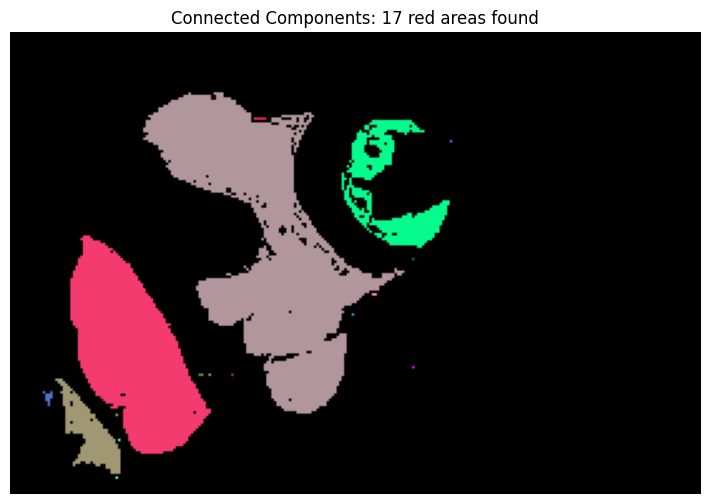

In [98]:
# OpenCV connectedComponents :
    # https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5

import cv2

# cv.connectedComponents(	image[, labels[, connectivity[, ltype]]]	) 
    # image	the 8-bit single-channel image to be labeled
    # labels	destination labeled image
    # connectivity	8 or 4 for 8-way or 4-way connectivity respectively
    # ltype	output image label type. Currently CV_32S and CV_16U are supported.
    # ccltype	connected components algorithm type

red_mask = maskColor("RED", "nemo.jpg")

# Convert 3-channel mask to single-channel by taking just the first channel
red_mask_single = red_mask[:, :, 0]

# Perform connected components labeling
# cv2.connectedComponents returns:
# - num_labels: total number of labels (background + objects)
# - labels: image where each pixel has the label of its component
num_labels, labels = cv2.connectedComponents(red_mask_single)

# Label 0 is background, so actual objects = total labels - 1
num_red_areas = num_labels - 1

print(f"Number of distinct red areas in nemo.jpg: {num_red_areas}")

# ======================================================================

# Simple one-image visualization
num_labels, labels = cv2.connectedComponents(red_mask_single)

# Create colored output
output = np.zeros((*labels.shape, 3), dtype=np.uint8)
for label in range(1, num_labels):
    output[labels == label] = np.random.randint(0, 255, 3)

plt.figure(figsize=(10, 6))
plt.imshow(output)
plt.title(f'Connected Components: {num_labels-1} red areas found')
plt.axis('off')
plt.show()


## Morphological operations

Morphological operations allow you to manipulate a binary image by making areas of *foreground* grow or shrink. You will find more information in the next page:

[https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html)

## Exercise 5

Remove the noise from your binarization of `nemo.jpg` before recounting the red areas.

Number of distinct red areas after cleaning: 6


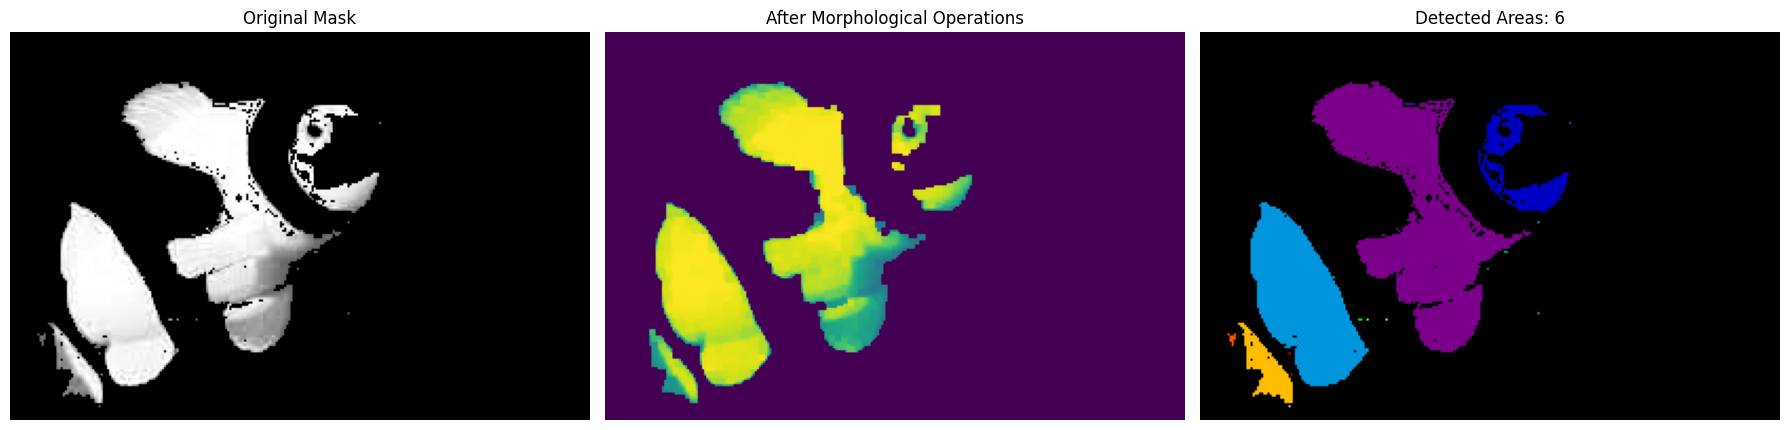

In [105]:
# erosion followed by dilation
    # opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

#  Dilation followed by Erosion
    # closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

def reduceNoise(imgPath):
    # Get the red mask
    red_mask = maskColor("RED", imgPath)
    red_mask_single = red_mask[:, :, 0]  # Convert to single channel

    # Create a kernel (structuring element)
    kernel = np.ones((3, 3), np.uint8)  # 3x3 zeroes square kernel


    # ---Apply morphological operations to clean the mask---
    # "Opening" to remove small noise, 
    cleaned_mask = cv2.morphologyEx(red_mask_single, cv2.MORPH_OPEN, kernel)
    # "Closing" to fill small holes
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel)


    # Count connected components on cleaned mask
    num_labels, labels = cv2.connectedComponents(cleaned_mask)
    num_red_areas = num_labels - 1

    return num_red_areas

num_red_areas = reduceNoise("nemo.jpg")

print(f"Number of distinct red areas after cleaning: {num_red_areas}")

# ================================================================


# Visualization
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(red_mask_single, cmap='gray')
plt.title('Original Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cleaned_mask)
plt.title('After Morphological Operations')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(labels, cmap='nipy_spectral')
plt.title(f'Detected Areas: {num_red_areas}')
plt.axis('off')

plt.tight_layout()
plt.show()



## Exercise 6

Binarize and label the image `coins.jpg`. How many coins are there. Knowing that there can only be 1€ and 10c coins, write a function that returns the amount of money present in an image of this type.

Total coins found: 7


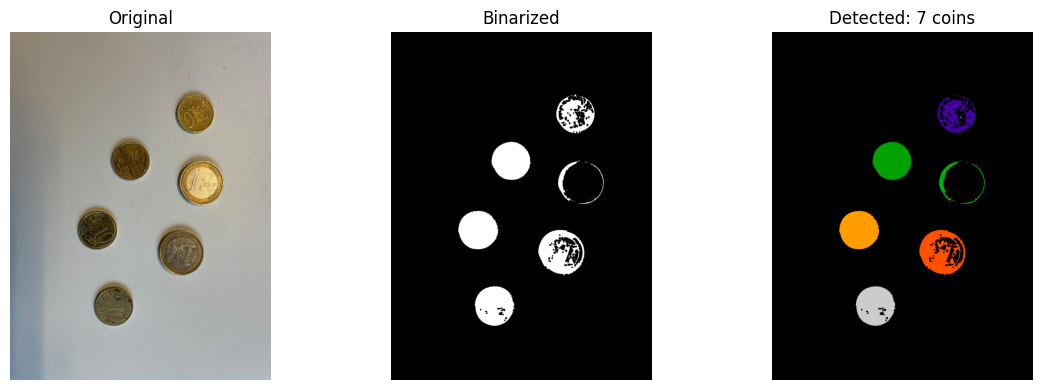

In [111]:


def countCoins(imgPath):
    img = plt.imread(imgPath)
    gray = rgb2gray(img)
    
    # numpy magic !
    bin_img = gray < 100   # apply threshold (if pixel intensity >100, True)
    
    # Convert boolean to uint8 for OpenCV (0 and 255)
    bin_uint8 = (bin_img * 255).astype(np.uint8)
    
    # Clean with morphological operations
    # kernel = np.ones((3,3), np.uint8)
    closing_kernel = np.ones((15, 15), np.uint8)  # Large kernel to fill markings
    opening_kernel = np.ones((5, 5), np.uint8)    # Smaller kernel for noise removal
    cleaned = cv2.morphologyEx(bin_uint8, cv2.MORPH_OPEN, opening_kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, closing_kernel)

    # Label components
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned, connectivity=8)

    # Only count components with significant area (real coins)
    min_coin_area = 1000  # Adjust this based on your image
    coin_count = 0
    
    for i in range(1, num_labels):  # Skip background
        if stats[i, cv2.CC_STAT_AREA] > min_coin_area:
            coin_count += 1

    print(f"Total coins found: {coin_count}")

    return img, cleaned, labels, coin_count

# Get results
img, cleaned, labels, total_coins = countCoins("coins.jpg")


#=========================================================


# Simple visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cleaned, cmap='gray')
plt.title('Binarized')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(labels, cmap='nipy_spectral')
plt.title(f'Detected: {total_coins} coins') 
plt.axis('off')

plt.tight_layout()
plt.show()

# Points of interest

The detection of points of interest is the basis of a large number of algorithms based on image processing. One of the methods used is Harris corner detection. You can find more information on the following page:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

# Exercise 7

Detect the points of interest in the image `chessboard.jpg`.

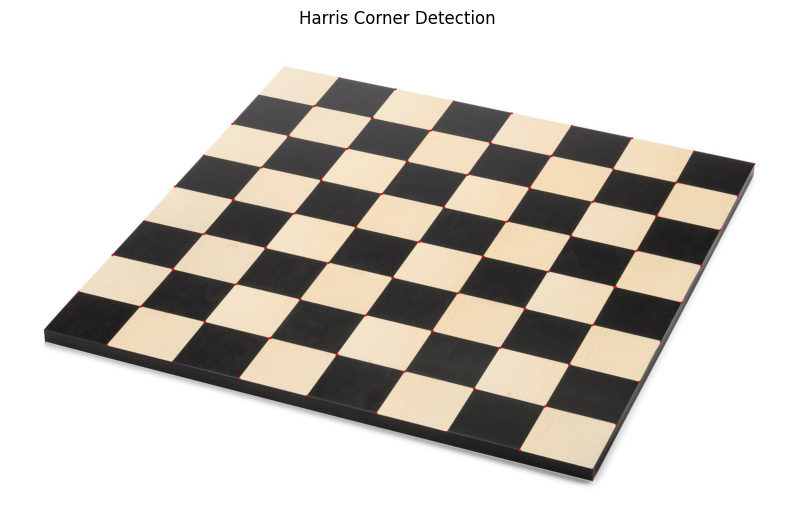

In [112]:
# Code from the url above, only modif is using mtplt instead of cv2

import cv2
import numpy as np
import matplotlib.pyplot as plt


# Harris function : https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
# cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)
    # src	Input single-channel 8-bit or floating-point image.
    # dst	Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
    # blockSize	Neighborhood size (see the details on cornerEigenValsAndVecs ).
    # ksize	Aperture parameter for the Sobel operator.
    # k	Harris detector free parameter. See the formula above.
    # borderType	Pixel extrapolation method. See BorderTypes. BORDER_WRAP is not supported.


img = cv2.imread('chessboard.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_img = np.float32(gray_img)
dst = cv2.cornerHarris(gray_img, 2, 3, 0.04)

# Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

# Hough transform

The Hough transform is used to detect parametric shapes in an image. It is often used to detect lines or circles. You will find more information on the following page:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

Detected 6 circles


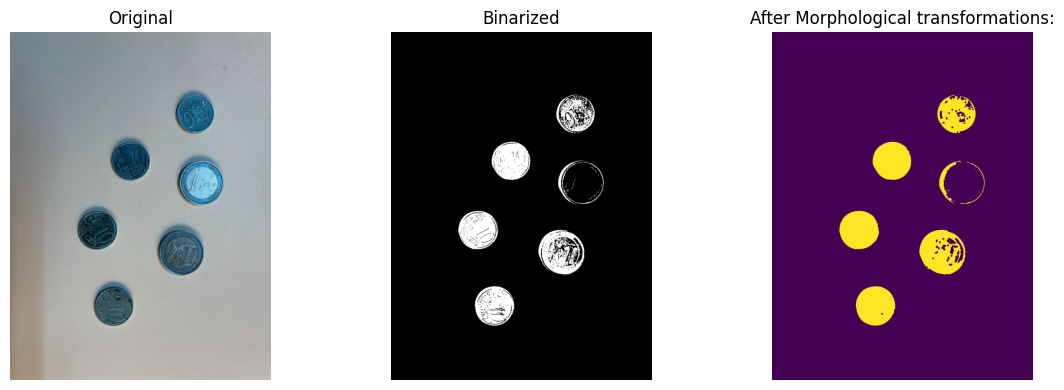

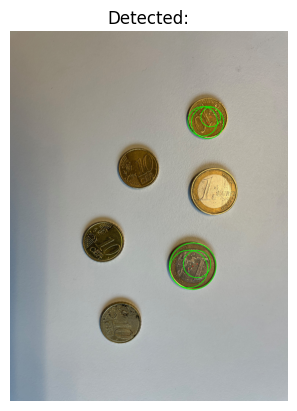

In [ ]:
# Detect circles of the coins.jpg

# Cool tutorial : https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html

# use cv2.HoughCircles()
    # gray: Input image (grayscale).
    # circles: A vector that stores sets of 3 values: xc,yc,r for each detected circle.
    # HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
    # dp = 1: The inverse ratio of resolution.
    # min_dist = gray.rows/16: Minimum distance between detected centers.
    # param_1 = 200: Upper threshold for the internal Canny edge detector.
    # param_2 = 100*: Threshold for center detection.
    # min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
    # max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.


# --- Load image ---
img = cv2.imread('coins.jpg')
output = img.copy()

# --- Preprocessing ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 2)   # smooth edges

# --- Optional binarization ---
# bin_uint8 = (gray < 100).astype(np.uint8) * 255  
bin_img = gray < 100
bin_uint8 = (bin_img * 255).astype(np.uint8)

# --- Morphological cleaning ---
closing_kernel = np.ones((15, 15), np.uint8)   # close gaps in coin edges
opening_kernel = np.ones((5, 5), np.uint8)     # remove small noise
cleaned = cv2.morphologyEx(bin_uint8, cv2.MORPH_OPEN, opening_kernel)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, closing_kernel)


# Detect Areas
# num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned, connectivity=8)

# Créer un masque pour les cercles détectés
# mask1 = np.zeros_like(cleaned)  # Masque noir de la même taille que l'image
# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for i in circles[0, :]:
#         # Dessiner des cercles sur le masque
#         cv2.circle(mask1, (i[0], i[1]), i[2], (255), thickness=-1) 


# --- Circle detection --- (Hough Transform)
circles = cv2.HoughCircles(
    cleaned,                          # input image
    cv2.HOUGH_GRADIENT,            # detection method
    dp=1.2,                        # inverse ratio of accumulator resolution
    minDist=50,          # minimum distance between circle centers
    param1=100,                    # upper threshold for Canny edge detector
    param2=50,                     # threshold for center detection
    minRadius=80,                  # minimum circle radius
    maxRadius=300                  # maximum circle radius
)


# --- Draw circles ---
if circles is not None:
    circles = np.uint16(np.around(circles))  # round and convert to int
    print(f"Detected {circles.shape[1]} circles")
    for (x, y, r) in circles[0, :]:
        cv2.circle(output, (x, y), r, (0, 255, 0), 5)   # draw circle outline
        cv2.circle(output, (x, y), 2, (0, 0, 255), 6)   # draw circle center
else :
    print("No circles detected...")

final_res = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
# ======================================================

# BGR to RGB for proper colors
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bin_uint8, cmap='gray')
plt.title('Binarized')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cleaned)
plt.title(f'After Morphological transformations:') 
plt.axis('off')

plt.tight_layout()
plt.show()


#---
plt.imshow(final_res)
plt.title("Detected:")
plt.axis('off')
plt.show()



# Exercise 8

Detect the straight lines in the image `chessboard.jpg`.

Detected 111 line segments with HoughLinesP


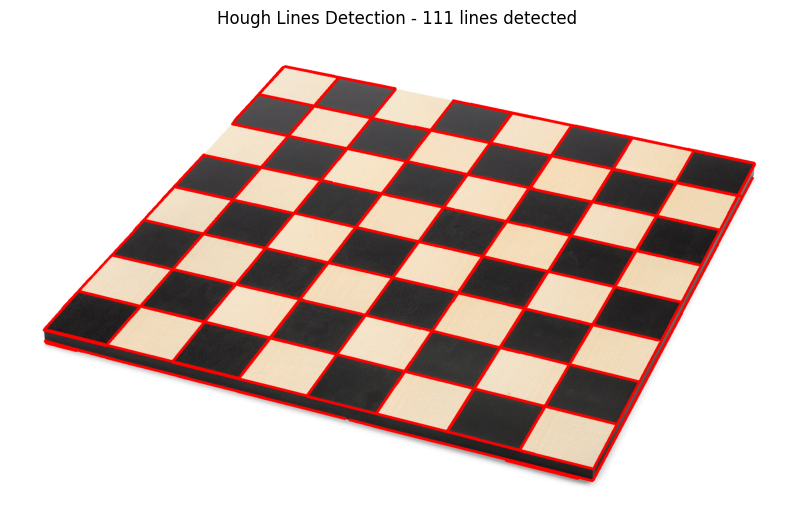

In [ ]:
# Probabilistic Hough Lines :




# --- Load ---
img = cv2.imread('chessboard.jpg')
output = img.copy()

# --- Preprocessing ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

# ----- Probabilistic Hough -----

# Alternative approach with HoughLinesP
linesP = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=50,        # Lower threshold for more detections
    minLineLength=30,    # Minimum line length
    maxLineGap=10        # Maximum gap between line segments
)

output_p = img.copy()
if linesP is not None:
    print(f"Detected {len(linesP)} line segments with HoughLinesP")
    for i in range(len(linesP)):
        line = linesP[i][0]
        x1, y1, x2, y2 = line
        cv2.line(output_p, (x1, y1), (x2, y2), (0, 0, 255), 5)


output_rgb = cv2.cvtColor(output_p, cv2.COLOR_BGR2RGB)

# ===================================================

plt.figure(figsize=(10, 10))
plt.imshow(output_rgb)
plt.title(f'Probabilistic Hough Transform - {len(linesP) if linesP is not None else 0} lines detected')
plt.axis('off')
plt.show()
        

Detected 111 line segments with HoughLinesP


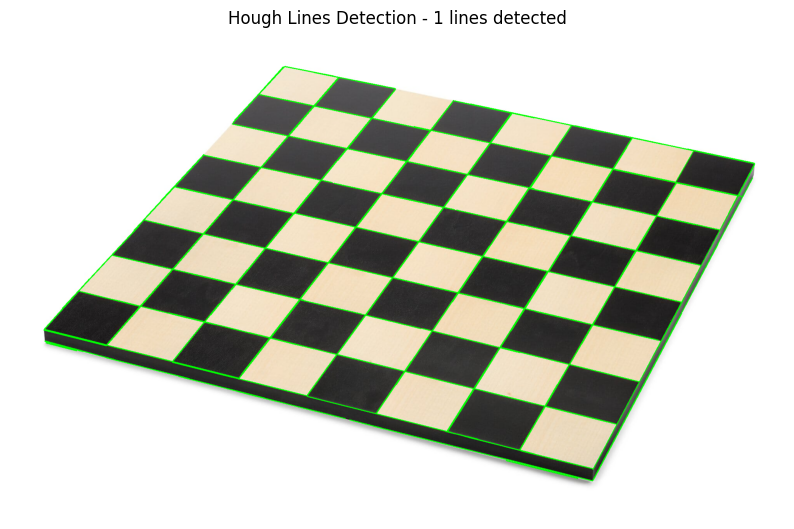

In [ ]:
# TODO: model cant detect more than one line ?
# cv.HoughLines(	image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]	)
    # image	: 8-bit, single-channel binary source image. The image may be modified by the function.
    # lines	: Output vector of lines. Each line is represented by a 2 or 3 element vector (ρ,θ) or (ρ,θ,votes), where ρ is the distance from the coordinate origin (0,0) (top-left corner of the image), θ is the line rotation angle in radians ( 0∼vertical line,π/2∼horizontal line ), and votes is the value of accumulator.
    # rho	: Distance resolution of the accumulator in pixels.
    # theta	: Angle resolution of the accumulator in radians.
    # threshold	: Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
    # srn	: For the multi-scale Hough transform, it is a divisor for the distance resolution rho. The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn. If both srn=0 and stn=0, the classical Hough transform is used. Otherwise, both these parameters should be positive.
    # stn	: For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
    # min_theta	: For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
    # max_theta	: For standard and multi-scale Hough transform, an upper bound for the angle. Must fall between min_theta and CV_PI. The actual maximum angle in the accumulator may be slightly less than max_theta, depending on the parameters min_theta and theta.


# --- Load ---
img = cv2.imread('chessboard.jpg')
output = img.copy()

# --- Preprocessing ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)


# --- Detect lines (Hough) ---
lines = cv2.HoughLines(
    edges, 
    rho=1, 
    theta=np.pi/180, 
    threshold=20
    )


if lines is not None:
    print(f"Detected {len(lines[0])} Lines.")
    for rho, theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)
else :
    print("No Lines detected...")


output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# ===================================================

plt.figure(figsize=(10, 10))
plt.imshow(output_rgb)
plt.title(f'Hough Lines Detection - {len(lines[0]) if lines is not None else 0} lines detected')
plt.axis('off')
plt.show()




In [ ]:
# --- Load and preprocess ---
img = cv2.imread('chessboard.jpg')
output = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)




# Final exercise

Use the result of the previous lab to flatten the document in the photo `document.jpg`. This time, the detection of the position of the document must be automatic.